In [1]:
!pip install pandas numpy seaborn plotly yfinance

In [29]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
# Отримання історичних даних для Apple Inc.
apple_stock = yf.download('AAPL', start='2023-01-01', end='2024-05-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
# Відображення перших кількох рядків DataFrame
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904625,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182610,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937317,70790800


In [8]:
# Побудова ціни закриття акцій Apple
fig = px.line(apple_stock, x=apple_stock.index, y='Close', title='Ціни на закриття акцій Apple (2023-2024)')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [23]:
# Отримання історичних даних для кількох акцій
stocks = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL'], start='2018-01-01', end='2024-05-01')['Close']

# Нормалізування цін, щоб вони починалися зі 100
normalized_stocks = stocks.div(stocks.iloc[0]).mul(100)

# Відображення нормалізованих даних
normalized_stocks.head()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2018-01-02 00:00:00+00:00,100.000000,100.000000,100.000000,100.000000,100.000000
2018-01-03 00:00:00+00:00,99.982585,101.277531,101.706098,101.791423,101.979408
2018-01-04 00:00:00+00:00,100.447001,101.730851,102.101171,101.604015,102.267866
2018-01-05 00:00:00+00:00,101.590622,103.375077,103.455056,102.993059,104.436265
2018-01-08 00:00:00+00:00,101.213289,104.866229,103.820313,103.781281,105.460782


In [12]:
# Побудова нормалізованих цін на акції
fig = px.line(normalized_stocks, title='Порівняння ефективності акцій (2018-2024)')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Normalized Price')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [17]:
# Обчислення 5-денної середньої, що рухається для акцій Apple
apple_stock['5-day MA'] = apple_stock['Close'].rolling(window=5).mean()

# Побудова ціни закриття та 5-денної середньої, що рухається
fig = px.line(apple_stock, x=apple_stock.index, y=['Close', '5-day MA'],
title='Ціна акцій Apple і 5-денна середня, що рухається')

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [24]:
# Розрахунок 30-денної змінної волатильності
apple_stock['30-day Volatility'] = apple_stock['Close'].pct_change().rolling(window=30).std() * (252 ** 0.5)

# Побудова графіка волатильності
fig = px.line(apple_stock, x=apple_stock.index, y='30-day Volatility',
title='30-денна змінна волатильність акцій Apple')

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



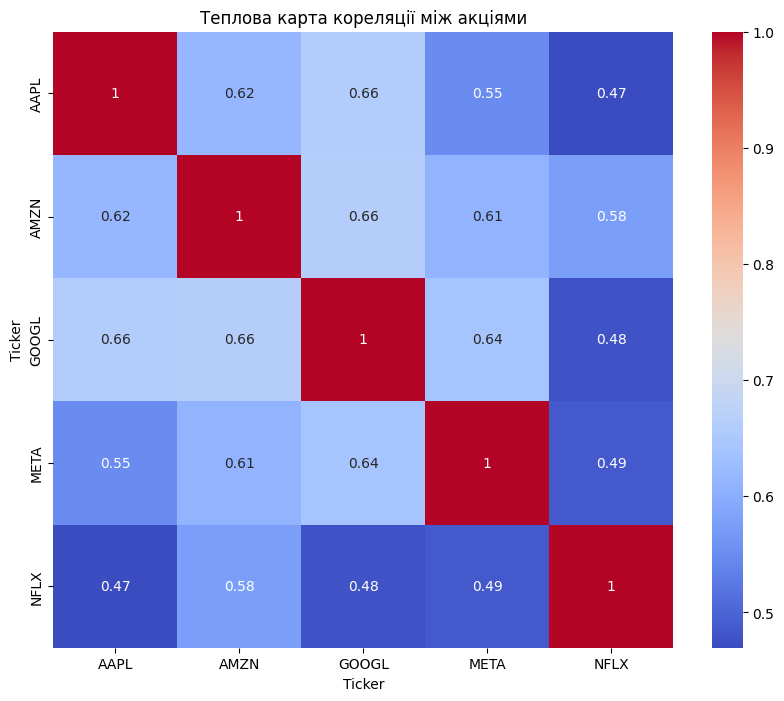

In [25]:
# Розрахунок кореляційної матриці
correlation_matrix = stocks.pct_change().corr()

# Побудова теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції між акціями')
plt.show()

In [31]:
# Створення Свічкової діаграми акцій Apple
candlestick = go.Figure(data=[go.Candlestick(x=apple_stock.index,
                                             open=apple_stock['Open'],
                                             high=apple_stock['High'],
                                             low=apple_stock['Low'],
                                             close=apple_stock['Close'])])

candlestick.update_layout(title='Свічкова діаграма акцій Apple',
xaxis_rangeslider_visible=False)
candlestick.show()

In [32]:
# Обчислення коефіцієнта Шарпа
risk_free_rate = 0.01 # Припускаючи безризикову ставку 1%
daily_returns = apple_stock['Close'].pct_change()
excess_returns = daily_returns - risk_free_rate / 252
sharpe_ratio = excess_returns.mean() / excess_returns.std() * (252 ** 0.5)
print(f"Коефіцієнт Шарпа: {sharpe_ratio}")

Коефіцієнт Шарпа: 1.199218334252643


In [36]:
# Розрахунок щоденних надходжень
daily_returns = apple_stock['Close'].pct_change()

# Розрахунок середнього прибутку портфелю
average_portfolio_return = daily_returns.mean() * 252

# Безризикова ставка
risk_free_rate = 0.01

# Бета портфоліо
beta = 1.2
# Розрахунок Коефіцієнта Трейнора
treynor_ratio = (average_portfolio_return - risk_free_rate) / beta
print(f"Коефіцієнт трейнора: {treynor_ratio}")

Коефіцієнт трейнора: 0.20450238500877083
